In [1]:
import pandas as pd
import numpy as np
from scipy.stats import genextreme

In [2]:
data = pd.read_csv('../data/Estaciones/hourly_data.csv',sep = ';')

In [3]:
data.head()

,dates,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,1/01/2000 00:00,0.487,1.163,1.654,0.866,0.024,1.495,0.176,0.922,0.018,...,0.253,3.113,1.294,3.189,1.535,1.343,0.288,1.953,3.687,2.451
1,1/01/2000 03:00,0.000,0.502,0.443,0.127,0.608,1.176,1.571,1.718,0.258,...,0.638,1.884,0.609,0.016,16.765,0.569,1.482,1.210,2.378,0.672
2,1/01/2000 06:00,1.673,0.925,0.939,0.467,0.356,2.361,1.647,2.024,0.056,...,0.243,2.160,5.146,1.304,0.532,3.432,0.568,0.081,5.402,2.997
3,1/01/2000 09:00,0.094,2.102,0.460,0.050,1.104,0.350,3.611,0.284,0.063,...,0.257,0.836,0.777,1.181,0.014,0.998,1.891,1.548,0.297,0.721
4,1/01/2000 12:00,0.860,0.336,0.333,1.840,0.211,0.317,2.293,0.606,0.140,...,0.232,3.277,7.056,2.911,0.015,0.086,1.233,1.040,1.828,1.512


In [4]:
def max_values_and_time_per_year(data):
    # First, convert the 'dates' column to datetime format
    data['dates'] = pd.to_datetime(data['dates'], format='%d/%m/%Y %H:%M')

    # Extract the year from the 'dates' column
    data['year'] = data['dates'].dt.year

    # Create an empty DataFrame to store the results
    result = pd.DataFrame()

    # Loop through each column (excluding 'dates' and 'year')
    for column in data.columns[1:-1]:
        # Find the row index for the max value for each year
        idx_max_per_year = data.loc[data.groupby('year')[column].idxmax()]

        # Extract the year, column max value, and corresponding time
        result[column + '_max'] = idx_max_per_year[column].values
        result[column + '_time'] = idx_max_per_year['dates'].dt.strftime('%Y-%m-%d %H:%M').values

    # Add the 'year' column to the result DataFrame
    result['year'] = idx_max_per_year['year'].values

    return result

# Example usage:
max_values_with_time = max_values_and_time_per_year(data)
print(max_values_with_time)


   X1_max           X1_time  X2_max           X2_time  X3_max  \
0  13.657  2000-11-27 00:00  12.199  2000-11-15 06:00   8.902   
1  17.345  2001-04-03 00:00  17.063  2001-01-18 12:00  11.569   
2  19.318  2002-05-17 00:00  11.376  2002-06-18 12:00  16.293   
3  16.380  2003-07-26 06:00  18.091  2003-03-23 18:00   6.981   
4  15.193  2004-06-11 06:00  11.277  2004-07-22 21:00  10.168   
5  25.112  2005-05-30 06:00  15.736  2005-05-14 00:00   7.212   
6  22.147  2006-12-21 09:00  12.021  2006-06-11 06:00   9.796   
7  13.736  2007-01-21 00:00  17.176  2007-05-21 21:00   6.838   
8  22.698  2008-03-04 15:00  14.151  2008-12-23 00:00  15.408   
9  14.992  2009-11-08 18:00  17.390  2009-11-22 21:00  19.079   

            X3_time  X4_max           X4_time  X5_max           X5_time  ...  \
0  2000-10-07 18:00  22.396  2000-01-12 09:00   7.674  2000-02-04 00:00  ...   
1  2001-11-20 06:00  28.314  2001-07-22 18:00   7.619  2001-01-18 21:00  ...   
2  2002-01-07 21:00  69.770  2002-07-13 00:0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21428\2145520190.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result['year'] = idx_max_per_year['year'].values


In [5]:
def max_values_per_year_accumulated(data, accumulation_hours):
    # Convert the 'dates' column to datetime format
    data['dates'] = pd.to_datetime(data['dates'], format='%d/%m/%Y %H:%M')

    # Set the 'dates' column as the index
    data.set_index('dates', inplace=True)

    # Create an empty dictionary to store results for each accumulation period
    results = {}

    # Loop over the desired accumulation periods
    for hours in accumulation_hours:
        # Resample the data by summing over the accumulation period (e.g., every 3 hours)
        resampled_data = data.resample(f'{hours}h').sum()  # Use lowercase 'h' for hours

        # Extract the year from the resampled data
        resampled_data['year'] = resampled_data.index.year

        # Group by year and get the maximum value for each column
        max_values = resampled_data.groupby('year').max()/hours

        # Store the result in the dictionary with the accumulation period as the key
        results[f'{hours}_hour_accumulation'] = max_values

    return results

# Example usage:
accumulation_hours = [3, 6, 9, 12, 15, 18, 21, 24]
max_values_accumulated = max_values_per_year_accumulated(data, accumulation_hours)

# To view results for a specific accumulation period, e.g., 3-hour accumulation:
print(max_values_accumulated['3_hour_accumulation'])


            X1        X2        X3         X4        X5        X6        X7  \
year                                                                          
2000  4.552333  4.066333  2.967333   7.465333  2.558000  6.359333  4.037000   
2001  5.781667  5.687667  3.856333   9.438000  2.539667  8.500333  4.200667   
2002  6.439333  3.792000  5.431000  23.256667  1.456000  8.640000  4.708000   
2003  5.460000  6.030333  2.327000   9.586333  3.109667  5.348000  5.853333   
2004  5.064333  3.759000  3.389333  12.676667  2.472000  4.924333  5.515333   
2005  8.370667  5.245333  2.404000  11.690333  1.652667  4.964667  5.863333   
2006  7.382333  4.007000  3.265333   8.493667  3.750333  6.604667  7.687000   
2007  4.578667  5.725333  2.279333   8.945667  2.212000  4.419667  5.283333   
2008  7.566000  4.717000  5.136000   9.581667  3.393667  6.160000  7.332333   
2009  4.997333  5.796667  6.359667  10.592667  3.753000  8.561000  6.211000   

            X8        X9       X10  ...       X41  

In [6]:
def fit_gev_and_predict(data, accumulation_hours, return_periods):
    # Dictionary to store final predictions
    final_results = {}

    # Loop over each accumulation period
    for hours in accumulation_hours:
        # Get the table for this accumulation period
        max_table = data[f'{hours}_hour_accumulation']

        # Create a dictionary to store predictions for each column
        predictions = {}

        # Loop over each column in the max_table
        for column in max_table.columns:
            # Fit GEV distribution to the data of the column
            params = genextreme.fit(max_table[column])

            # Calculate the return levels for the given return periods
            return_levels = {}
            for T in return_periods:
                # Return period (T) is related to the probability p = 1/T
                return_value = genextreme.ppf(1 - 1/T, *params)
                return_levels[f'{T}_year_return'] = return_value

            # Store the return levels for this column
            predictions[column] = return_levels

        # Store the predictions for this accumulation period
        final_results[f'{hours}_hour_accumulation'] = predictions

    return final_results

# Example usage:
accumulation_hours = [3, 6, 9, 12, 15, 18, 21, 24]
return_periods = [5, 10, 20, 50, 100]

# Assuming `max_values_accumulated` contains the max values per year for each accumulation period
final_predictions = fit_gev_and_predict(max_values_accumulated, accumulation_hours, return_periods)


In [7]:
pd.DataFrame(final_predictions['3_hour_accumulation'])

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
5_year_return,6.870118,5.792532,4.621013,12.613873,3.604458,7.571860,6.589818,3.579456,0.536728,5.894966,...,2.451063,13.717599,8.327344,13.596529,10.967549,6.157788,4.465910,3.714508,8.213955,10.285951
10_year_return,8.059611,5.922108,6.279786,15.215841,3.695216,8.533063,7.151300,4.004032,0.614773,6.859608,...,2.670955,15.366512,9.556442,15.838106,15.657617,7.157747,4.884405,3.771249,8.320854,13.713738
20_year_return,9.532439,5.979473,8.707113,18.524627,3.729639,9.471035,7.623144,4.540461,0.691421,7.926988,...,2.891078,17.031171,10.854753,18.284247,23.188282,8.299571,5.292281,3.795397,8.363397,19.521616
50_year_return,12.077146,6.011196,13.784350,24.417813,3.745766,10.708795,8.149836,5.488861,0.793298,9.550081,...,3.190013,19.313479,12.728051,21.945980,40.718178,10.098882,5.829772,3.808196,8.384379,33.908573
100_year_return,14.603643,6.021133,19.833409,30.442113,3.749995,11.654134,8.490522,6.451523,0.871660,10.974306,...,3.424865,21.123382,14.289811,25.110322,63.816073,11.733358,6.239718,3.812028,8.390194,53.999804


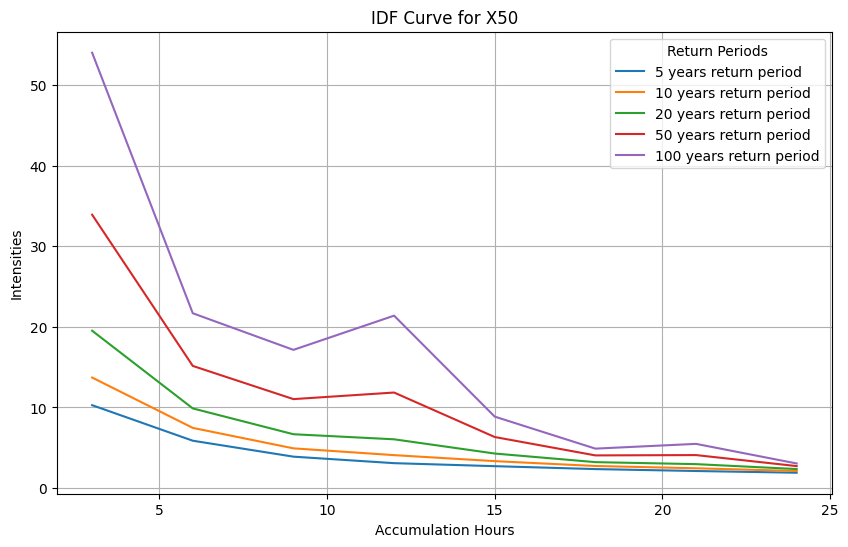

In [8]:
import matplotlib.pyplot as plt

def plot_idf_curve(final_predictions, column):
    # Extract the numeric accumulation hours from the keys
    accumulation_hours = [int(hours.split('_')[0]) for hours in final_predictions.keys()]
    return_periods = list(final_predictions[f'{accumulation_hours[0]}_hour_accumulation'][column].keys())

    # Prepare a dictionary to store values for each return period
    idf_data = {period: [] for period in return_periods}

    # Populate the dictionary with values for each accumulation period and return period
    for hours in accumulation_hours:
        for period in return_periods:
            idf_data[period].append(final_predictions[f'{hours}_hour_accumulation'][column][period])

    # Plot the IDF curves
    plt.figure(figsize=(10, 6))
    
    for period in return_periods:
        period_years = period.split('_')[0]  # Extract just the number from the key
        plt.plot(accumulation_hours, idf_data[period], label=f'{period_years} years return period')

    # Labeling the axes and the plot
    plt.xlabel('Accumulation Hours')
    plt.ylabel('Intensities')
    plt.title(f'IDF Curve for {column}')
    plt.legend(title='Return Periods')
    plt.grid(True)
    plt.show()

# Example usage:
plot_idf_curve(final_predictions, 'X50')  # Replace 'X50' with the column you want to plot
